## <center> Import Libs

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

import seaborn as sns
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from statsmodels.graphics.tsaplots import plot_pacf

import warnings 
warnings.filterwarnings('ignore')

## <center> Import Data

In [2]:
data = pd.read_csv('data/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## <center> Data Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## <center> Null Values / Duplicates

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
print(f"Duplicated Data: {data.duplicated().sum()}")

Duplicated Data: 0


## <center> Dealing with Null data

In [7]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer = SimpleImputer()

for column in data.columns:
    data[column] = imputer.fit_transform(np.array(data[column]).reshape(-1,1))

data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## <center> Data Analysis

### Plot Potability ratio

<AxesSubplot:xlabel='Potability', ylabel='count'>

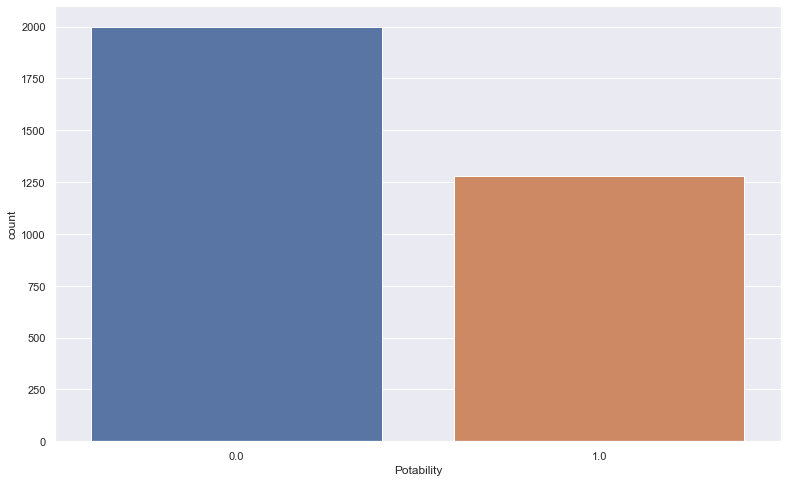

In [8]:
sns.countplot(data['Potability'])

### PH & Turbidity impact

<AxesSubplot:xlabel='ph', ylabel='Turbidity'>

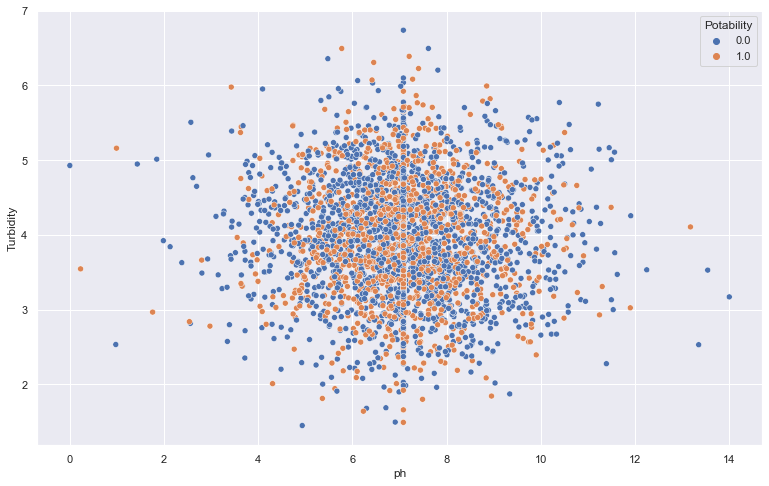

In [9]:
sns.scatterplot(
    x = data['ph'],
    y = data['Turbidity'],
    hue = data['Potability']
)

### Hardness & Solids

<AxesSubplot:xlabel='Hardness', ylabel='Solids'>

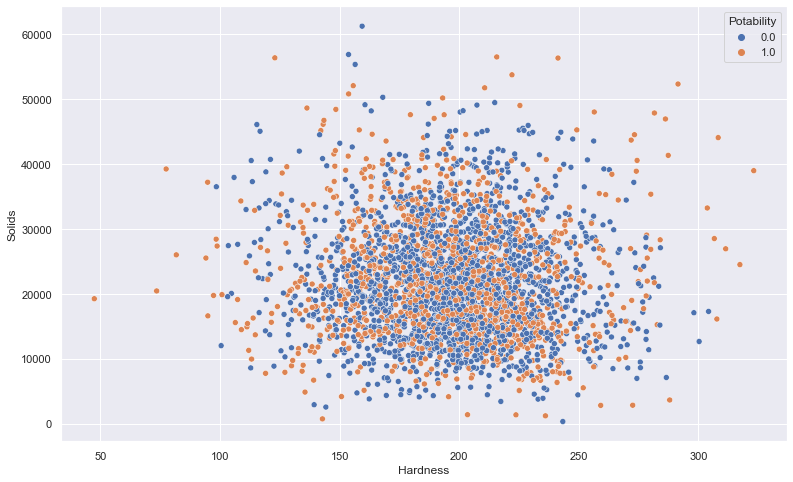

In [10]:
sns.scatterplot(
    x = data['Hardness'],
    y = data['Solids'],
    hue = data['Potability']
)

### Sulfate & Conductivity

<AxesSubplot:xlabel='Sulfate', ylabel='Conductivity'>

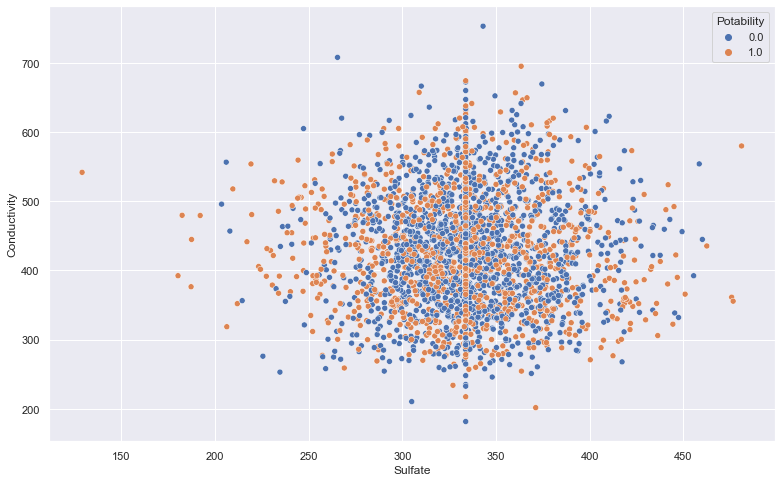

In [11]:
sns.scatterplot(
    x = data['Sulfate'],
    y = data['Conductivity'],
    hue = data['Potability']
)

### Organic_carbon & Trihalomethanes

<AxesSubplot:xlabel='Organic_carbon', ylabel='Trihalomethanes'>

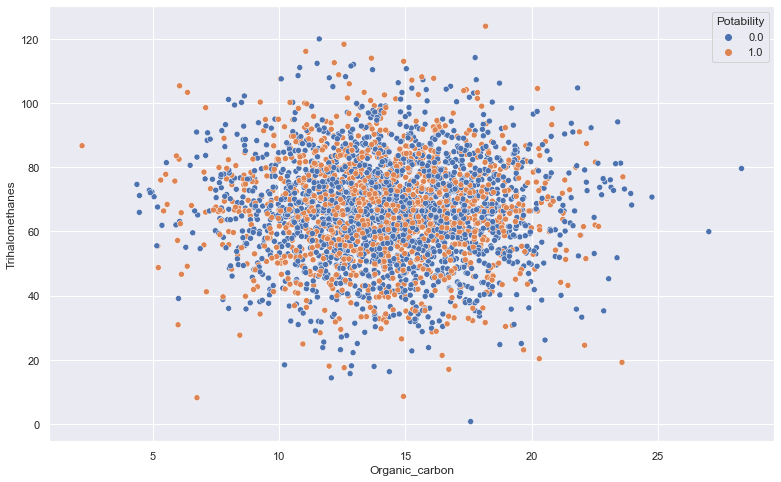

In [12]:
sns.scatterplot(
    x = data['Organic_carbon'],
    y = data['Trihalomethanes'],
    hue = data['Potability']
)

## <center> Correlation Check

<AxesSubplot:>

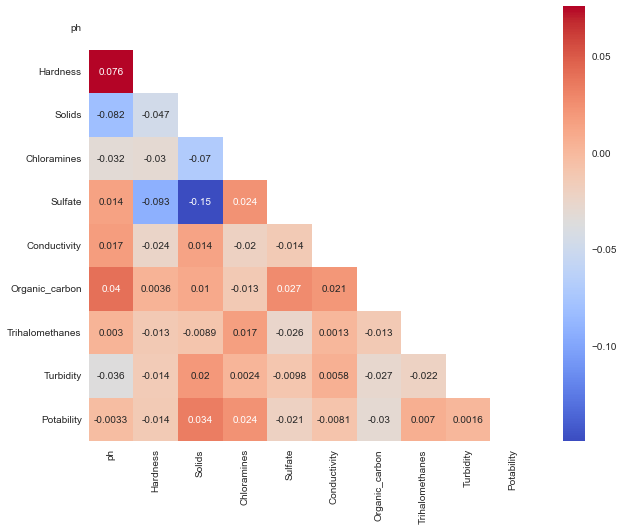

In [15]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(
    data.corr(), 
    mask=mask, 
    cmap='coolwarm', 
    annot = True
)

## <center> Modeling

In [16]:
from pycaret.classification import *

clf = setup(data, target = "Potability", session_id = 1)
compare_models()

,Description,Value
0,Session id,1
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6672,0.6818,0.3264,0.6499,0.4329,0.2326,0.2611,0.0100
et,Extra Trees Classifier,0.6629,0.6703,0.2918,0.6541,0.4014,0.2133,0.2475,0.0750
catboost,CatBoost Classifier,0.6629,0.6829,0.3465,0.6227,0.4436,0.2301,0.2508,0.6480
rf,Random Forest Classifier,0.6551,0.6560,0.3119,0.6153,0.4134,0.2048,0.2287,0.1160
gbc,Gradient Boosting Classifier,0.6433,0.6389,0.2393,0.6119,0.3417,0.1584,0.1917,0.1110
lightgbm,Light Gradient Boosting Machine,0.6402,0.6561,0.3878,0.5571,0.4556,0.2003,0.2083,0.1100
xgboost,Extreme Gradient Boosting,0.6337,0.6447,0.4113,0.5403,0.4664,0.1957,0.2001,0.1010
nb,Naive Bayes,0.6154,0.5753,0.2102,0.5277,0.2978,0.0954,0.1166,0.0150
lda,Linear Discriminant Analysis,0.6110,0.4878,0.0056,0.3333,0.0109,0.0050,0.0269,0.0090
lr,Logistic Regression,0.6101,0.4929,0.0034,0.2333,0.0066,0.0024,0.0152,0.5930


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)